# Single Qubit Rotation 

Below we start with a basic example of a hybrid variational algorithm which involves flipping the bloch vector of a qubit from the $\ket{0}$ to the $\ket{1}$ state. First we import the relevant packages and set our backend to simulate our workflow on NVIDIA GPUs. 




In [1]:
import cudaq
from cudaq import spin

cudaq.set_target("nvidia")

In [2]:
qubit_count = 1

# Initialize a kernel/ ansatz and variational parameters.
kernel, parameters = cudaq.make_kernel(list)

# Allocate qubits that are initialised to the |0> state.
qubits = kernel.qalloc(qubit_count)

# Define gates and the qubits they act upon.
kernel.rx(parameters[0], qubits[0])
kernel.ry(parameters[1], qubits[0])

# Our hamiltonian will be the Z expectation value of our qubit.
hamiltonian = spin.z(0)

# Initial gate parameters which intialize the qubit in the zero state
initial_parameters = [0, 0]

In [3]:
cost_values = []

We build our cost function such that its minimal value corresponds to the qubit being in the $\ket{1}$ state. The observe call below allows us to simulate our statevector $\ket{\psi}$, and calculate $\bra{\psi}Z\ket{\psi}$.


In [4]:
def cost(parameters):
    """Returns the expectation value as our cost."""
    expectation_value = cudaq.observe(kernel, hamiltonian,parameters).expectation_z()
    cost_values.append(expectation_value)
    return expectation_value

In [5]:
# We see that the initial value of our cost function is one, demonstrating that our qubit is in the zero state
initial_cost_value = cost(initial_parameters)
print(initial_cost_value)

1.0


Below we use our built-in optimization suite to minimize the cost function. We will be using the gradient free COBYLA alogrithm. 

In [6]:
# Define a CUDA Quantum optimizer.
optimizer = cudaq.optimizers.COBYLA()
optimizer.initial_parameters = initial_parameters

result = optimizer.optimize(dimensions=2, function=cost)

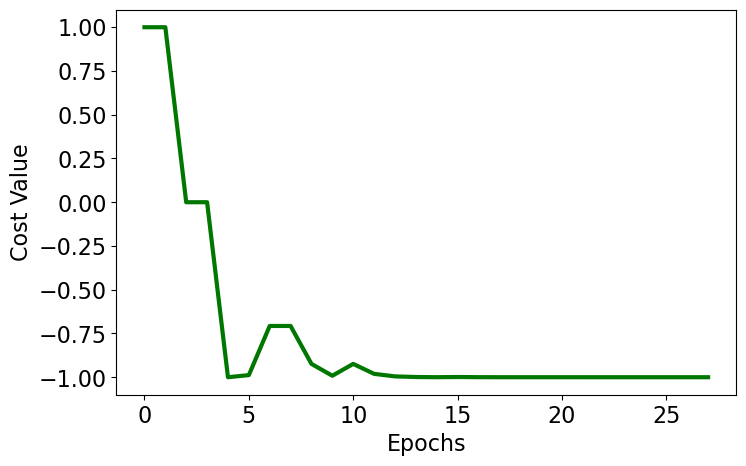

In [7]:
# Plotting how the value of the cost function decreases during the minimization procedure.
# !pip install matplotlib
import matplotlib.pyplot as plt

x_values = list(range(len(cost_values)))
y_values = cost_values

plt.figure(figsize=(8,5))
plt.plot(x_values, y_values,'-',c='#070',lw=3)
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("Cost Value",fontsize=16)
plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

We see that the final value or our cost function, $\bra{\psi}Z\ket{\psi} = -1$ demonstrating that the qubit is in the $\ket{1}$ state.